<a href="https://colab.research.google.com/github/cesarinrc07-ship-it/Estad-stica2025B/blob/main/Tarea_22_octubre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
url = "https://raw.githubusercontent.com/cesarinrc07-ship-it/Estad-stica2025B/refs/heads/main/Galton_Family_Heights.csv"
df = pd.read_csv(url)
df

,Father_height,Mother_height,Child_height,gender
0,78.5,67.0,73.2,1
1,78.5,67.0,69.2,0
2,78.5,67.0,69.0,0
3,78.5,67.0,69.0,0
4,75.5,66.5,73.5,1
...,...,...,...,...
929,62.0,66.0,64.0,1
930,62.0,66.0,62.0,0
931,62.0,66.0,61.0,0
932,62.5,63.0,66.5,1


a) A partir de los datos disponibles, ¿qué relación parece existir entre la estatura del padre y la estatura del hijo o hija?

Coeficiente de correlación:  0.2660

Coeficiente de determinación:  0.0708

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.4729



,df,sum_sq,mean_sq,F,PR(>F)
Father_height,1.0,845.970289,845.970289,70.987983,1.349808e-16
Residual,932.0,11106.729251,11.917091,NaN,NaN


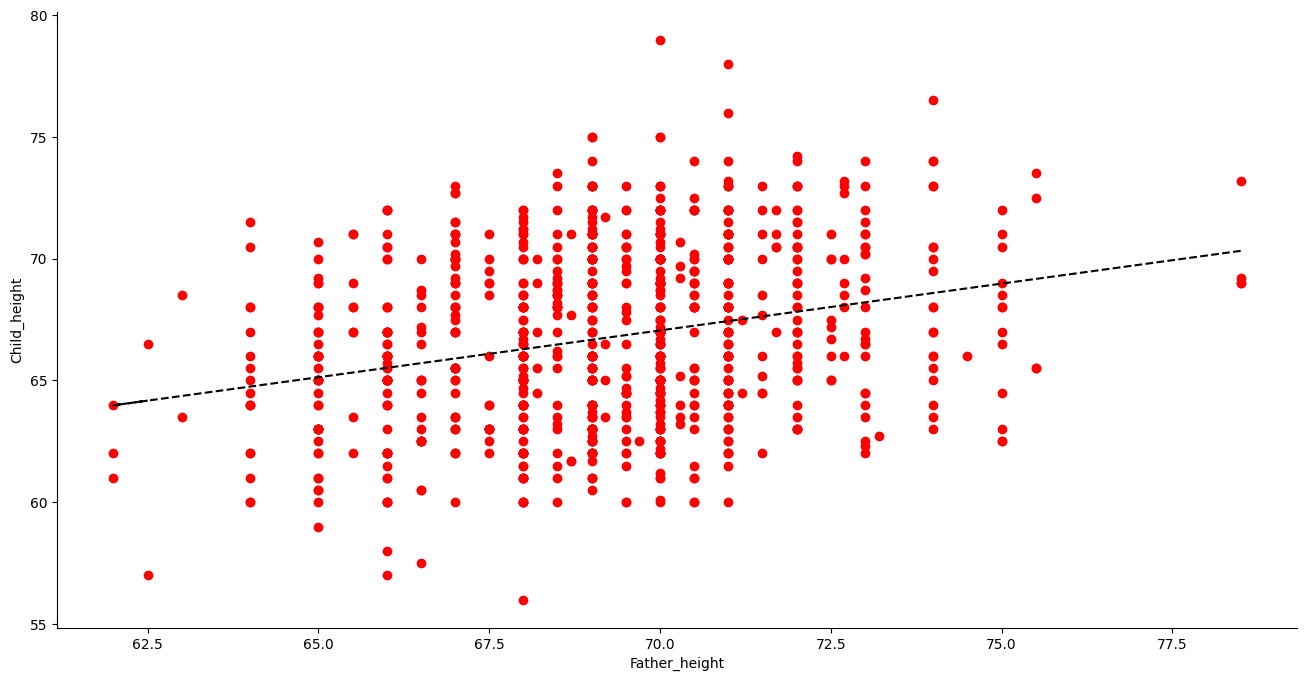

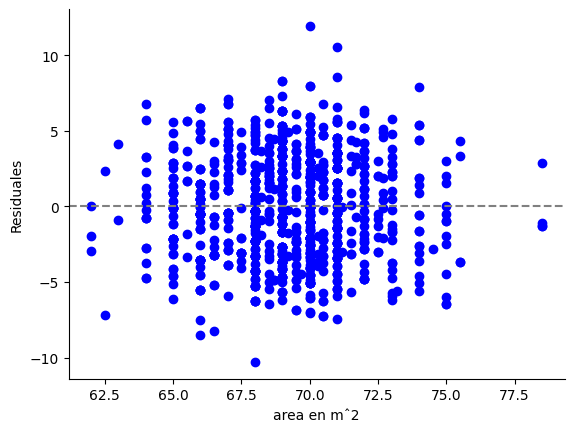

In [35]:
x = df["Father_height"]
y = df["Child_height"]

#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8), dpi = 100)
plt.scatter(x, y, label = "Child_height", color = 'red')
plt.xlabel('Father_height') # nombrar eje x
plt.ylabel('Child_height') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
#nivel_de_confianza = 0.95
#intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
#intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
#print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
#print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x = 70, y = {modelo.predict([1, 70])}')
#print(f'para x = 75, y = {modelo.predict([1, 75])}')
#print(f'para x = 84, y = {modelo.predict([1, 84])}\n')

# Tabla ANOVA.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('Child_height ~ Father_height', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

B)¿Qué tipo de relación observas entre la estatura de la madre y la estatura del hijo o hija?


Coeficiente de correlación:  0.2013

Coeficiente de determinación:  0.0405

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.1348



,df,sum_sq,mean_sq,F,PR(>F)
Mother_height,1.0,484.449211,484.449211,39.370144,5.362412e-10
Residual,932.0,11468.250328,12.304990,NaN,NaN


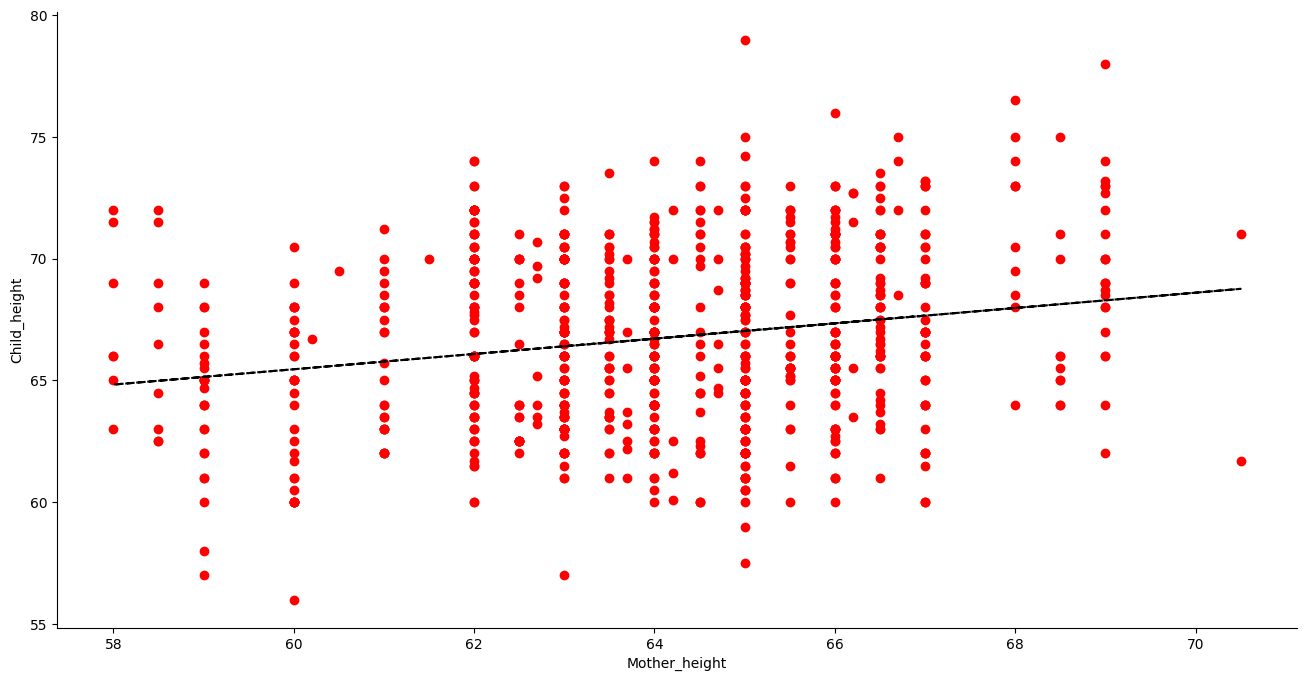

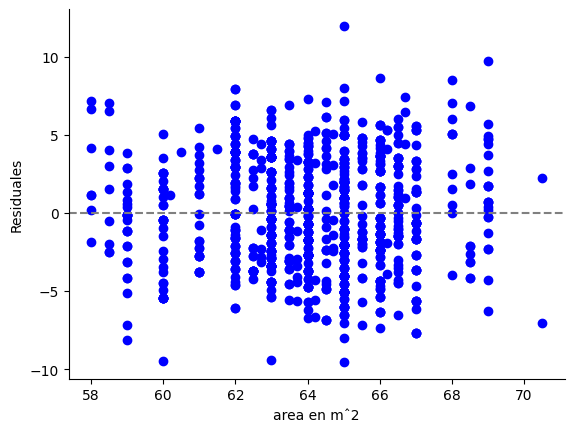

In [36]:
x = df["Mother_height"]
y = df["Child_height"]

#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8), dpi = 100)
plt.scatter(x, y, label = "Child_height", color = 'red')
plt.xlabel('Mother_height') # nombrar eje x
plt.ylabel('Child_height') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
#nivel_de_confianza = 0.95
#intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
#intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
#print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
#print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x = 70, y = {modelo.predict([1, 70])}')
#print(f'para x = 75, y = {modelo.predict([1, 75])}')
#print(f'para x = 84, y = {modelo.predict([1, 84])}\n')

# Tabla ANOVA.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('Child_height ~ Mother_height', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

c) Analiza si existe alguna relación evidente entre la estatura del padre y la estatura de la madre.

Coeficiente de correlación:  0.0604

Coeficiente de determinación:  0.0036

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.1708



,df,sum_sq,mean_sq,F,PR(>F)
Father_height,1.0,17.843301,17.843301,3.408693,0.065171
Residual,932.0,4878.689633,5.234646,NaN,NaN


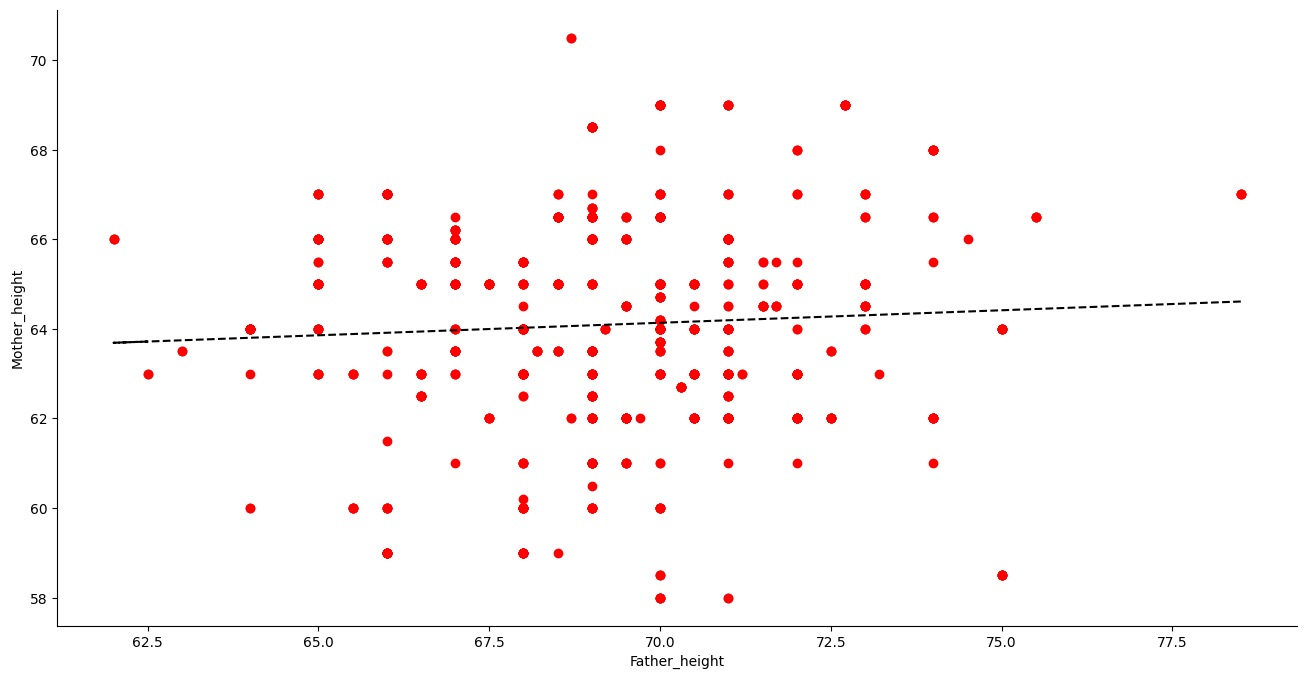

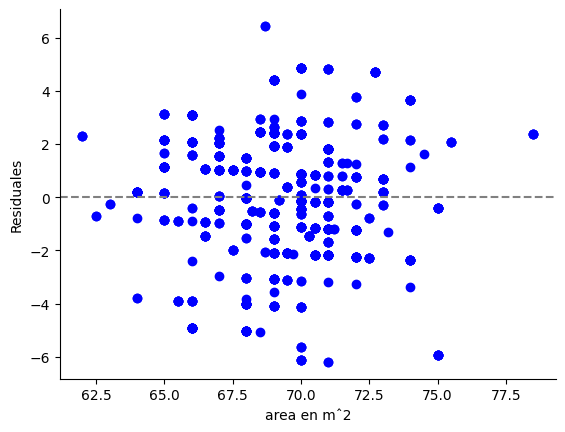

In [37]:
x = df["Father_height"]
y = df["Mother_height"]

#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8), dpi = 100)
plt.scatter(x, y, label = "Mother_height", color = 'red')
plt.xlabel('Father_height') # nombrar eje x
plt.ylabel('Mother_height') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
#nivel_de_confianza = 0.95
#intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
#intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
#print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
#print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x = 70, y = {modelo.predict([1, 70])}')
#print(f'para x = 75, y = {modelo.predict([1, 75])}')
#print(f'para x = 84, y = {modelo.predict([1, 84])}\n')

# Tabla ANOVA.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('Mother_height ~ Father_height', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

D) Considerando las estaturas registradas. ¿Como influye el genero en la estatura del hijo o hija?


Coeficiente de correlación:  0.7167

Coeficiente de determinación:  0.5137

valor-p de Shapiro:  0.0109

valor_p de Breusch-Pagan:  0.0305



,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,6139.765860,6139.765860,984.401698,4.681854e-148
Residual,932.0,5812.933679,6.237053,NaN,NaN


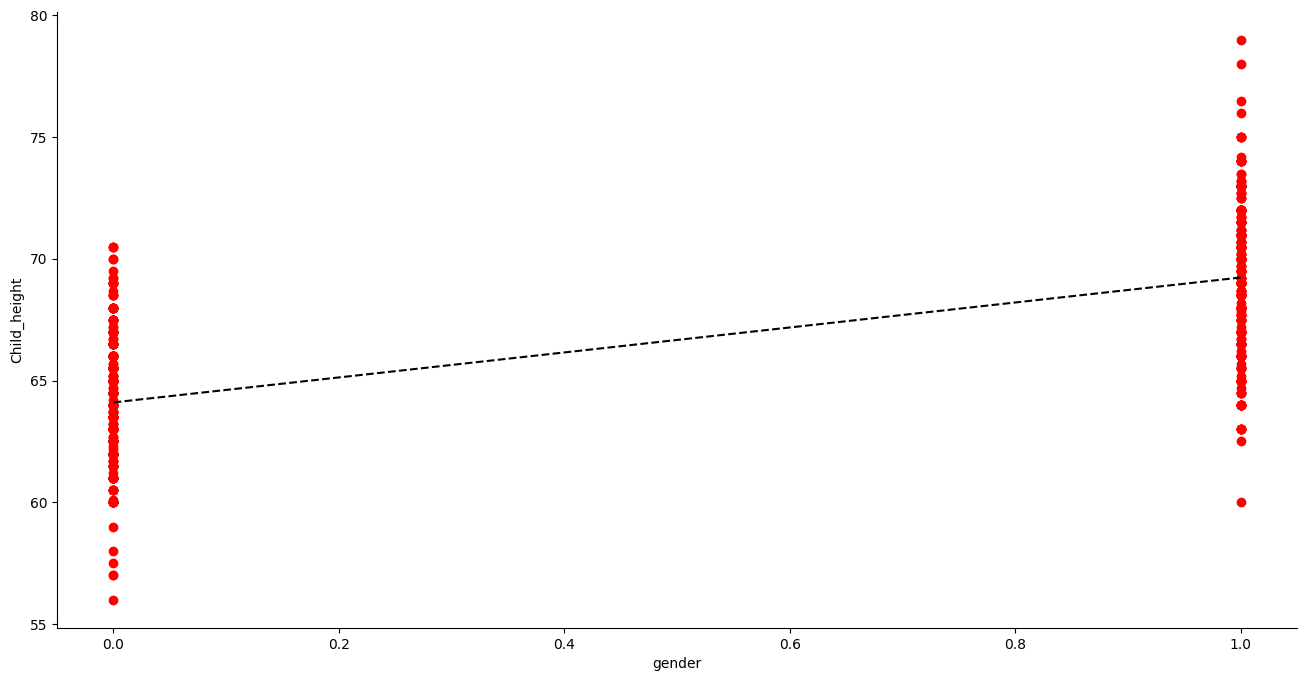

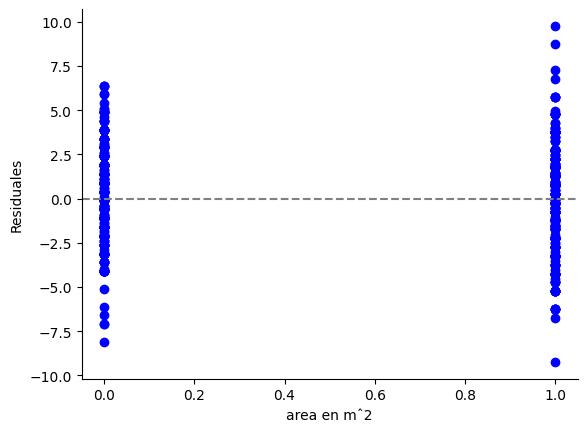

In [38]:
x = df["gender"]
y = df["Child_height"]

#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8), dpi = 100)
plt.scatter(x, y, label = "Child_height", color = 'red')
plt.xlabel('gender') # nombrar eje x
plt.ylabel('Child_height') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
#nivel_de_confianza = 0.95
#intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
#intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
#print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
#print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x = 70, y = {modelo.predict([1, 70])}')
#print(f'para x = 75, y = {modelo.predict([1, 75])}')
#print(f'para x = 84, y = {modelo.predict([1, 84])}\n')

# Tabla ANOVA.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('Child_height ~ gender', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

E) Propon una ecuación matematica que permita estimar la estatura del hijo o hija a partir de la estatura de sus padres

f) Evalúa la utilidad práctica de la expresión obtenida en el inciso anterior para realizar estimaciones en otros casos.

Coeficiente de determinación:  0.1052

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.6431



,df,sum_sq,mean_sq,F,PR(>F)
Father_height,1.0,845.970289,845.970289,73.641822,3.880896e-17
Mother_height,1.0,411.742112,411.742112,35.842204,3.051589e-09
Residual,931.0,10694.987139,11.487634,NaN,NaN


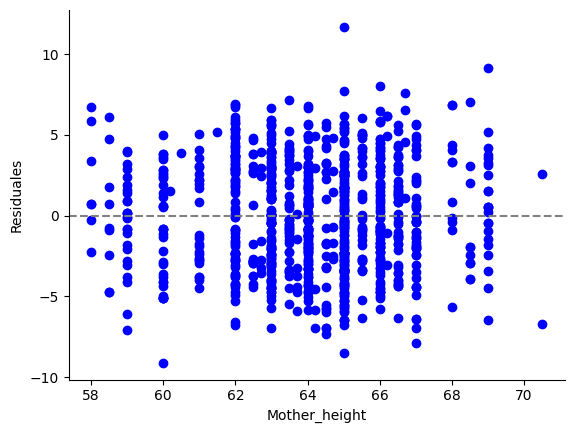

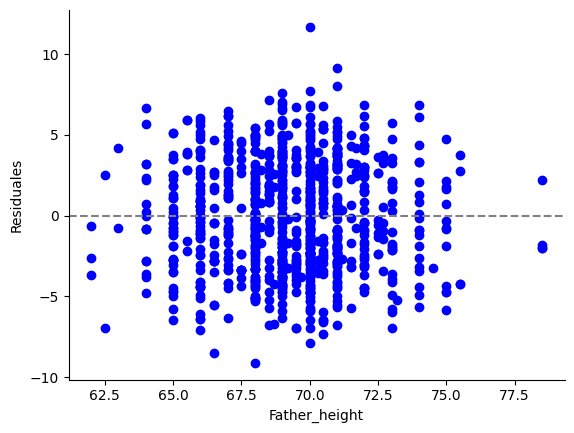

In [39]:
x = df[["Father_height", "Mother_height"]]
y = df["Child_height"]

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure()
plt.scatter(x ["Mother_height"], residuales, color = 'blue') # Changed to plot against Father_height
plt.xlabel('Mother_height') # Changed label
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

residuales = modelo.resid
plt.figure()
plt.scatter(x ["Father_height"], residuales, color = 'blue') # Changed to plot against Father_height
plt.xlabel('Father_height') # Changed label
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# Tabla ANOVA.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('Child_height ~ Father_height + Mother_height', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

G) Si el padre mide 69 pulgadas y la madre 65 pulgadas, estima la estatura esperada del hijo

In [40]:

padre_mide = 69
madre_mide = 65
nuevos_datos = [1.0, padre_mide, madre_mide]
estatura_estimada = modelo.predict(nuevos_datos)
estatura_predicha = estatura_estimada[0]
print(f"Estatura del Padre: {padre_mide} pulgadas")
print(f"Estatura de la Madre: {madre_mide} pulgadas")
print(f"La estatura estimada del hijo/a es: {estatura_predicha:.2f} pulgadas")


Estatura del Padre: 69 pulgadas
Estatura de la Madre: 65 pulgadas
La estatura estimada del hijo/a es: 66.94 pulgadas


h) Examina los valores residuales del análisis anterior y comenta si observas algún patrón sistemático o irregularidad que deba considerarse.

i) ¿Qué utilidad práctica tiene todo el análisis realizado? ¿A qué sectores podría ayudar y en qué forma? Da una respuesta extensa.